**Objective:** The goal of this project is to create a Python script that will compare composition between two microbial communities (using Jaccard similarity). I then aim to visually represent this similarity in a proportional Venn diagram figure.  
**Outcomes:** I want the script to output a Jaccard index value (a number value to quantify beta diversity of the two microbial communities), and I also want it to create a visual representation of the overlap in similarity. This figure will look like a proportional Venn diagram (see Figure 1 below for a conceptual drawing of how it might appear).  
  
<img src="venndiagram.jpg" alt="sketch_image" width="400"/>

**References:**  
1. Kumar, R., Eipers, P., Little, RB., et al., 2014. Getting started with microbiome analysis: sample acquisition to bioinformatics. Current protocols in human genetics, 82(18), pp. 1-29.  
2. Xia, J.H., Lin, G., Fu, G.H., et al., 2014. The intestinal microbiome of fish under starvation. BMC genomics, 15(1), pp. 266.
3. Hotaling, S., et al., 2018. Bacterial diversity in replicated hydrogen sulfide-rich streams. Microbiology of aquatic ecosystems, 77, pp. 559-573.

**Study Site used in Analysis:**

<img src="site_map.png" alt="sites" width="600"/>

Yellow triangles indicate sulfidic sites, and blue triangles indicate nonsulfidic sites.

In [31]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from scipy.spatial import distance_matrix

In [32]:
# Import the data and create lists of family names
# Add your own path here:
data = pd.read_csv('/Users/HP/Desktop/Coding/project/stream_data.csv', header=0)
Nonsulfidic_environment = data['Nonsulfidic_environment'].dropna().unique().tolist()
Sulfidic_environment = data['Sulfidic_environment'].dropna().unique().tolist()

In [33]:
# Determine how many members are shared between the two sets
shared_OTUs = set(Nonsulfidic_environment) & set(Sulfidic_environment)
number_shared_OTUs = len(shared_OTUs)

In [34]:
# Calculates total number of elements in both lists
total_OTUs = len(Nonsulfidic_environment) + len(Sulfidic_environment)

In [35]:
# Calculates the Jaccard index (quantifies similarity between two communities)
Jaccard = number_shared_OTUs / total_OTUs
print(Jaccard)

0.17857142857142858


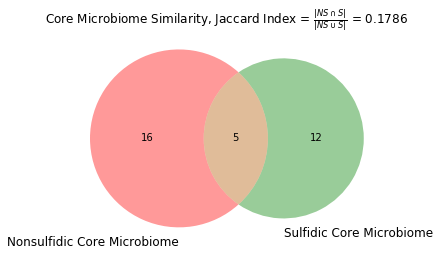

In [36]:
# Creates a two-way proportional Venn diagram showing similarity between two communities
# NS indicates nonsulfidic, S indicates sulfidic
venn2(subsets = (len(Nonsulfidic_environment), len(Sulfidic_environment), len(shared_OTUs)), set_labels=('Nonsulfidic Core Microbiome', 'Sulfidic Core Microbiome'))
plt.title(r'Core Microbiome Similarity, Jaccard Index = $\frac{|NS \cap S|}{|NS \cup S|}$ = 0.1786')
#plt.savefig('core_microbiome_similarity.png') # Use this line of code to save the figure.
plt.show()

In [37]:
# Converts the columns of family names for each nonsulfidic drainage into a list
puyNS = data['Puy_NS'].dropna().unique().tolist()
tacNS = data['Tac_NS'].dropna().unique().tolist()
pichNS = data['Pich_NS'].dropna().unique().tolist()

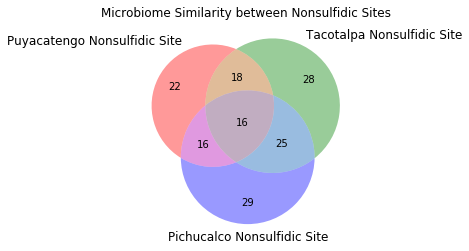

In [38]:
# Creates a proportional 3-way Venn diagram showing similarity between three nonsulfidic drainages 
puyNS_tacNS_shared = set(puyNS) & set(tacNS)
puyNS_pichNS_shared = set(puyNS) & set(pichNS)
tacNS_pichNS_shared = set(tacNS) & set(pichNS)
all_sharedNS = set(puyNS) & set(tacNS) & set(pichNS)
venn3(subsets = (len(puyNS), len(tacNS), len(puyNS_tacNS_shared), len(pichNS), len(puyNS_pichNS_shared), len(tacNS_pichNS_shared), len(all_sharedNS)), set_labels = ('Puyacatengo Nonsulfidic Site', 'Tacotalpa Nonsulfidic Site', 'Pichucalco Nonsulfidic Site'))
plt.title('Microbiome Similarity between Nonsulfidic Sites')
#plt.savefig('similarity_NS_sites.png') # Use this line of code to save the figure.
plt.show()

In [39]:
# Converts the columns of family names for each sulfidic drainage into a list
puyS = data['Puy_S'].dropna().unique().tolist()
tacS = data['Tac_S'].dropna().unique().tolist()
pichS = data['Pich_S'].dropna().unique().tolist()

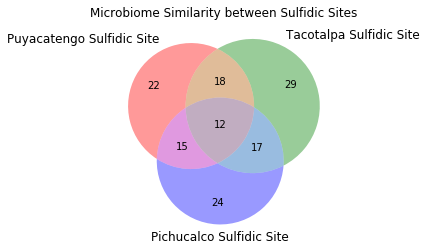

In [40]:
# Creates a proportional 3-way Venn diagram showing similarity between three sulfidic drainages 
puyS_tacS_shared = set(puyS) & set(tacS)
puyS_pichS_shared = set(puyS) & set(pichS)
tacS_pichS_shared = set(tacS) & set(pichS)
all_sharedS = set(puyS) & set(tacS) & set(pichS)
venn3(subsets = (len(puyS), len(tacS), len(puyS_tacS_shared), len(pichS), len(puyS_pichS_shared), len(tacS_pichS_shared), len(all_sharedS)), set_labels = ('Puyacatengo Sulfidic Site', 'Tacotalpa Sulfidic Site', 'Pichucalco Sulfidic Site'))
plt.title('Microbiome Similarity between Sulfidic Sites')
#plt.savefig('similarity_S_sites.png') # Use this line of code to save the figure.
plt.show()

In [41]:
# Imports the abundance data for the core microbiomes
# Add your own path here:
abundance_data = pd.read_csv('/Users/HP/Desktop/Coding/project/abundance_data.csv', header=0)

In [42]:
# Creates lists of abundances (read counts) for each family at each site
puyNS_abundance = abundance_data['Puy_NS'].tolist()
tacNS_abundance = abundance_data['Tac_NS'].tolist()
pichNS_abundance = abundance_data['Pich_NS'].tolist()
puyS_abundance = abundance_data['Puy_S'].tolist()
tacS_abundance = abundance_data['Tac_S'].tolist()
pichS_abundance = abundance_data['Pich_S'].tolist()

In [43]:
# Creates a data frame that can then be converted to a distance matrix
distance_data = [puyNS_abundance, tacNS_abundance, pichNS_abundance, puyS_abundance, tacS_abundance, pichS_abundance]
sites = ['Puy NS', 'Tac NS', 'Pich NS', 'Puy S', 'Tac S', 'Pich S']
df_abundance = pd.DataFrame(distance_data, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'], index=sites)
data_final_distance = pd.DataFrame(distance_matrix(df_abundance.values, df_abundance.values), index=df_abundance.index, columns=df_abundance.index)

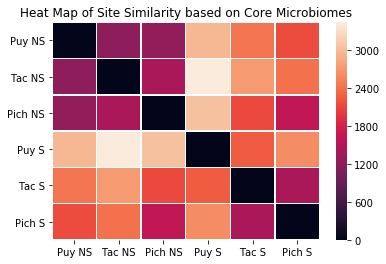

In [44]:
# Creates a heatmap from the distance matrix
heatmap_data = pd.DataFrame(data_final_distance, columns=['Puy NS', 'Tac NS', 'Pich NS', 'Puy S', 'Tac S', 'Pich S'])
create_heatmap = sns.heatmap(heatmap_data, linewidth=0.5)
plt.title('Heat Map of Site Similarity based on Core Microbiomes')
#plt.savefig('heat_map_core_microbiomes.png') # Use this line of code to save the figure.
plt.show()